# 機械学習スクラッチ　線形回帰

線形回帰のクラスをスクラッチで作成する。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装する。


In [1]:
#基本ライブラリ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## プログラムの具体的な理解

クラスを作成する前に、クラスの中で実現したいことについて、具体的なデータで処理の流れを確認する。


In [2]:
#検証のためにシード値の設定
np.random.seed(seed=32)

#サンプルデータ
X = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15]])

#線形回帰を行う際に、wx0のバイアス項を新規にデータに加える
bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
X = np.concatenate([bias, X], 1)

#暫定のシータ値を生成する
theta = np.full(X.shape[1], np.random.rand())
print("シータ初期値=", theta)
print("theta.shape", theta.shape)

#暫定シータ値をもとに仮定値を生成する
h = np.dot(theta, X.T)

#ドット積なので、行列の形が合わないとエラーが出る
#h2 = np.dot(theta.T, X)

print("theta.T=", theta.T)
print("theta.T.shape=", theta.T.shape)
print("X",X)
print("X.T",X.T)

#ドット積の具体的な中身は以下
print("----手動計算----")
print("h_0 =",theta[0]*X[0,0]+theta[1]*X[0,1]+ theta[2]*X[0,2]+ theta[3]*X[0,3])
print("h_1 =",theta[0]*X[1,0]+theta[1]*X[1,1]+ theta[2]*X[1,2]+ theta[3]*X[1,3])
print("h_2 =",theta[0]*X[2,0]+theta[1]*X[2,1]+ theta[2]*X[2,2]+ theta[3]*X[2,3])
print("h_3 =",theta[0]*X[3,0]+theta[1]*X[3,1]+ theta[2]*X[3,2]+ theta[3]*X[3,3])
print("h_4 =",theta[0]*X[4,0]+theta[1]*X[4,1]+ theta[2]*X[4,2]+ theta[3]*X[4,3])

print("仮定関数 =", h)

df = pd.DataFrame(X)
df

シータ初期値= [0.85888927 0.85888927 0.85888927 0.85888927]
theta.shape (4,)
theta.T= [0.85888927 0.85888927 0.85888927 0.85888927]
theta.T.shape= (4,)
X [[ 1.  1.  2.  3.]
 [ 1.  4.  5.  6.]
 [ 1.  7.  8.  9.]
 [ 1. 10. 11. 12.]
 [ 1. 13. 14. 15.]]
X.T [[ 1.  1.  1.  1.  1.]
 [ 1.  4.  7. 10. 13.]
 [ 2.  5.  8. 11. 14.]
 [ 3.  6.  9. 12. 15.]]
----手動計算----
h_0 = 6.012224871051278
h_1 = 13.742228276688635
h_2 = 21.472231682325994
h_3 = 29.20223508796335
h_4 = 36.93223849360071
仮定関数 = [ 6.01222487 13.74222828 21.47223168 29.20223509 36.93223849]


,0,1,2,3
0,1.0,1.0,2.0,3.0
1,1.0,4.0,5.0,6.0
2,1.0,7.0,8.0,9.0
3,1.0,10.0,11.0,12.0
4,1.0,13.0,14.0,15.0


In [3]:
#目的値
y = np.array([5, 25, 38, 51, 76])

#仮定値と目的値の差分を出す
error = h-y

print("各サンプルの差分：", error)

各サンプルの差分： [  1.01222487 -11.25777172 -16.52776832 -21.79776491 -39.06776151]


In [4]:
#偏微分の中身１
#各サンプルの差分を各特徴量にかけてあげる
j0 = error*X[:,0]
j1 = error*X[:,1]
j2= error*X[:,2]
j3 = error*X[:,3]

#error.reshape(-1,1)*X  でも同じ処理

nde = np.array([j0,j1,j2,j3])
dfe = pd.DataFrame(nde.T)
dfe

,0,1,2,3
0,1.012225,1.012225,2.024450,3.036675
1,-11.257772,-45.031087,-56.288859,-67.546630
2,-16.527768,-115.694378,-132.222147,-148.749915
3,-21.797765,-217.977649,-239.775414,-261.573179
4,-39.067762,-507.880900,-546.948661,-586.016423


In [5]:
#偏微分の中身２
#特徴量ごとの誤差の平均を算出する
theta_sabun = nde.sum(axis=1)
print(theta_sabun)
print(theta_sabun/5)
print(theta_sabun/5*0.01)

[  -87.63884159  -885.57178895  -973.21063054 -1060.84947213]
[ -17.52776832 -177.11435779 -194.64212611 -212.16989443]
[-0.17527768 -1.77114358 -1.94642126 -2.12169894]


In [6]:
#偏微分で得られたシータの差分を引くと新しいシータができる
print("今のシータ", theta)
print("シータの傾", theta_sabun/5*0.01)
print("新しいシータ", theta - theta_sabun/5*0.01)

#この処理を繰り返すことでシータを更新していく

今のシータ [0.85888927 0.85888927 0.85888927 0.85888927]
シータの傾 [-0.17527768 -1.77114358 -1.94642126 -2.12169894]
新しいシータ [1.03416695 2.63003285 2.80531053 2.98058821]


## 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装する。

$$
h_θ(x) = θ_0x_0 + θ_1x_1+ \cdots + θ_jx_j + \cdots  + θ_nx_n (X_0 = 1)
$$

- x : 特徴量ベクトル
- θ: パラメータベクトル
- n : 特徴量の数
- xj : j番目の特徴量
- θj : j番目のパラメータ（重み）

特徴量の数nは任意の値に対応できる実装する。
なお、ベクトル形式で表すと以下のようになります。

$$
h_θ(x) = θ^T \cdot x
$$

_linear_hypothesisは、暫定のθの値に基づいて値を推測する関数である。
この関数は、fitによって呼び出され、errorの算出、偏微分の処理と共に一連のシータ更新処理を担う

In [7]:
def linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    #バイアス項の生成（実際のクラス実装では関数の外に定義する）
    bias = np.ones(X.shape[0]).reshape(X.shape[0],1)    
    X = np.concatenate([bias, X], 1)  #結合
    
    #シータの初期化（実際のクラス実装では関数の外に定義する）
    theta = np.full(X.shape[1], np.random.rand())  #初期化
    
    #この関数でやりたいのは以下の処理のみ
    h = np.dot(theta, X.T)
    
    return h


In [8]:
#テスト用（このセルは無視する）

X = np.array([[1], [4], [7], [10], [13]])
y = np.array([15, 25, 38, 51, 76])

num_iter = 0
theta = 0

def linear_hypothesis(X):
    global num_iter
    global theta
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    bias = np.ones(X.shape[0]).reshape(X.shape[0],1)    #バイアス項の生成
    
    x = np.concatenate([bias, X], 1)  #結合
    
    if num_iter ==0:
        theta = np.full(x.shape[1], np.random.rand())  #初期化
    
    h = np.dot(theta, x.T)
    
    return h

def gradient_descent(X, error=0):
    global num_iter
    global theta
    """
    説明を記述
    """
    #学習率
    lr = 0.01
    
    #イテレーション
    
    
    print(num_iter)

    #基準点の計算
    h = linear_hypothesis(X)   #初期値の取得
    h_list =[]
    
    for i in range(5):
        h_list.append((h[i]-y[i])**2)
    J_1 = sum(h_list)/(5*2)
    
    #次点の計算（シータ足す
    
    num_iter += 1
    theta += lr
    h = linear_hypothesis(X)
    h_list =[]
    print(num_iter)
    
    for i in range(5):
        h_list.append((h[i]-y[i])**2)
    J_2 = sum(h_list)/(5*2)
    
    if J_1 < J_2:   #増減が右肩上がり
        
        while J_2 < J_1:   #次点が基点より小さいうち（次点が大きくなったら終わり）
            J_1 = J_2    #次点を基準点にする
            theta -= lr
            h = linear_hypothesis(X)
            h_list =[] 
            for i in range(5):
                h_list.append((h[i]-y[i])**2)
            J_2 = sum(h_list)/(5*2)
            
    elif J_1 > J_2:    #増減が右肩下がり
        
        while J_2 < J_1:   #次点が基点より小さいうち（次点が大きくなったら終わり）
            J_1 = J_2    #次点を基準点にする
            theta += lr
            h = linear_hypothesis(X)
            h_list =[] 
            for i in range(5):
                h_list.append((h[i]-y[i])**2)
            J_2 = sum(h_list)/(5*2)

    return theta
        

print(gradient_descent(X))


0
1
[5.09271115 5.09271115]


## 【問題2】最急降下法
## 【問題3】推定

最急降下法により学習させる実装を行う。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにする。また、推定の仕組みをpredictメソッドに実装する。


$$
θ_{j} := θ_{j} - α\frac{1}{m}\sum_{i=1}^{m}[( h_θ(x^{(i)})-y^{(i)} ) x_j^{(i)}]
$$

- α : 学習率
- i : サンプルのインデックス
- j : 特徴量のインデックス


In [17]:
#完成したクラス
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, 
                 verbose=False,     #学習過程を出力する場合はTrue
                 bias=0, 
                 bias_val = 0,
                 num_iter=0,
                 num_iter_val=0, 
                 lr=0.001
                ):
        
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.iter_val = num_iter_val
        self.lr = lr
        self.bias = bias
        self.bias_val = bias_val
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter_val)
 
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #バイアス項の生成
        self.bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
        X = np.concatenate([self.bias, X], 1)
        
        #シータの初期値
        self.coef_ = np.full(X.shape[1], np.random.rand())
        #print(self.coef_)    #シータの初期値を確認
        
        for i in range(5000):
            self.iter += 1
            h = self._linear_hypothesis(X)    #仮定の生成
            error = self._error_gen(h, y)    #errorの算出
            #print("error=", error)             #erroeの確認
            self._gradient_descent(X, error)    #θの更新
            
            #損失関数の更新
            self.loss = np.append(self.loss, np.sum(error**2)/(2*X.shape[0]))
        
        
        #検証用
        if X_val is not None and y_val is not None:
            self.bias_val = np.ones(X_val.shape[0]).reshape(X_val.shape[0],1)
            X_val = np.concatenate([self.bias_val, X_val], 1)
            self.coef_val_ = np.full(X_val.shape[1], np.random.rand())
            #print(self.coef_val_)    #シータの初期値を確認
            
            for i in range(5000):
                self.iter_val += 1
                h = self._linear_hypothesis_val(X_val)    #仮定の生成
                error = self._error_gen(h, y_val)    #errorの算出
                #print("error=", error)             #erroeの確認
                self._gradient_descent_val(X_val, error)    #θの更新
                
                #損失関数の更新
                self.val_loss = np.append(self.val_loss, np.sum(error**2)/(2*X_val.shape[0]))
            
            
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)
            print(self.val_loss)
        pass

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        #バイアス項の生成
        
        p_bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
        X = np.concatenate([p_bias, X], 1)
        
        #推定
        p = np.dot(self.coef_, X.T)
        
        return p

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features+bias)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h = np.dot(self.coef_, X.T)
        return h

    def _linear_hypothesis_val(self, X):
        """
        検証データ用の線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features+bias)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h = np.dot(self.coef_val_, X.T)
        return h
    
    def _error_gen(self, h, y):
        """
        目的値と仮定値の差分を算出する
        """
        error = h - y
        
        return error

    def _gradient_descent(self, X, error):
        """
        誤差からθの差分を偏微分によって算出し、新しいθを生み出す
        
        Parameters
        -----------------
        X : 次の形のndarray, shape (n_samples, n_features+bias)
          学習データ
        error：目的値と仮定値の差分（ベクトル）
        
        Returns
        -----------
        θの更新なので、返り値はいらない
        """
        error_calc = error.reshape(-1,1)*X   #偏微分
        error_sum = error_calc.sum(axis=0)    #特徴量ごとに足す
        self.coef_ = self.coef_ - (error_sum/X.shape[0])*self.lr

    def _gradient_descent_val(self, X, error):
        """
        検証用データについて、誤差からθの差分を偏微分によって算出し、新しいθを生み出す
        コードの違いは「coef_val_」のみ
        Parameters
        -----------------
        X : 次の形のndarray, shape (n_samples, n_features+bias)
          学習データ
        error：目的値と仮定値の差分（ベクトル）
        
        Returns
        -----------
        θの更新なので、返り値はいらない
        """
        error_calc = error.reshape(-1,1)*X   #偏微分
        error_sum = error_calc.sum(axis=0)    #特徴量ごとに足す
        self.coef_val_ = self.coef_val_ - (error_sum/X.shape[0])*self.lr


In [11]:
#テスト
np.random.seed(seed=32)

X = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15]])
y = np.array([5, 25, 38, 51, 76])

X_val = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15]])
y_val = np.array([5, 25, 38, 51, 76])


SLR = ScratchLinearRegression()
SLR.fit(X, y, X_val, y_val)

In [12]:
#推定
y_pred = SLR.predict(X)
y_pred

array([ 5.6121535 , 22.33475177, 39.05735004, 55.77994832, 72.50254659])

## 【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成する。

$$
L(θ) = \frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)})-y^{(i)})^2
$$
m : 入力されるデータの数
hθ() : 仮定関数
x(i) : i番目のサンプルの特徴量ベクトル
y(i) : i番目のサンプルの正解値
なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用する。（問題5, 9）

In [11]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)  推定した値
    y : 次の形のndarray, shape (n_samples,)          正解値

    Returns
    ----------
    mse : numpy.float  平均二乗誤差
    """
    error_list = np.array([])    #リスト初期化
    
    #誤差を二乗したものをリストに追加
    for p, l in zip(y_pred, y):
        error_list = np.append(error_list, (p-y)**2)
    
    #リストの合計をサンプル数で割る
    mse = error_list.sum()/y.shape[0]
        
    return mse

In [15]:
MSE(y_pred, y)

-17.52776831767401

## 【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装する。そして、これをself.loss, self.val_lossに記録する。
目的関数（損失関数）J(θ)は次の式。

$$
J(θ) = \frac{1}{2m}\sum_{i=1}^{m}(h_θ(x^{(i)})-y^{(i)})^2
$$

- m：入力されるデータの数
- hθ()：仮定関数
- x(i)：i番目のサンプルの特徴量ベクトル
- y(i)：i番目のサンプルの正解値

In [17]:
#実装は1.4章を参照
"""
損失関数はベクトルではなく、単一の値として算出される。
1回の学習ごとに値が一つ生み出される。
サンプルごと誤差の平均を意味している
"""
print("---- loss ----")
print(SLR.loss[0:100])
print("---- val_loss ----")
print(SLR.val_loss[0:100])

---- loss ----
[240.23616932 139.88462093  83.18493678  51.14773899  33.04438611
  22.81339743  17.03015033  13.75979742  11.90918628  10.86070638
  10.26541933   9.92618154   9.73161056   9.6187774    9.55212836
   9.51157625   9.48577221   9.46830432   9.45554996   9.44546243
   9.43688535   9.42916542   9.42193349   9.41498103   9.4081902
   9.40149442   9.39485607   9.38825389   9.38167587   9.37511521
   9.36856807   9.36203227   9.35550657   9.34899029   9.342483
   9.33598449   9.32949462   9.3230133    9.31654048   9.31007614
   9.30362024   9.29717278   9.29073372   9.28430307   9.27788081
   9.27146692   9.2650614    9.25866423   9.25227541   9.24589492
   9.23952275   9.23315889   9.22680333   9.22045606   9.21411707
   9.20778634   9.20146387   9.19514965   9.18884366   9.1825459
   9.17625635   9.169975     9.16370185   9.15743687   9.15118007
   9.14493143   9.13869093   9.13245858   9.12623435   9.12001824
   9.11381024   9.10761033   9.10141852   9.09523477   9.08905909

## 【問題6】学習と推定

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行う。
scikit-learnによる実装と比べ、正しく動いているかを確認する。

In [4]:
#データフレームにデータを格納
df_0 = pd.read_csv('train.csv', index_col=0)
df = df_0.loc[:,["SalePrice", "GrLivArea", "YearBuilt"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
SalePrice    1460 non-null int64
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
dtypes: int64(3)
memory usage: 45.6 KB


In [39]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,[1,2]].values
y = df["SalePrice"].values

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=0,) #シードも設定しておく

print("X_train", np.shape(X_train))
print("X_test", np.shape(X_test))
print("Y_train", np.shape(y_train))
print("Y_test", np.shape(y_test))

X_train (1095, 2)
X_test (365, 2)
Y_train (1095,)
Y_test (365,)


In [47]:
#正規化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [48]:
#scilit-learnによる推定
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train) 
MSE(y_train_pred, y_train)

11077651508808.572

In [49]:
#スクラッチによる推定
SLR = ScratchLinearRegression()
SLR.fit(X_train, y_train, X_test, y_test)
y_train_pred_SLR = SLR.predict(X_train) 
MSE(y_train_pred_SLR, y_train)

11055711566153.791

## 【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行する。グラフを見て損失が適切に下がっているかどうか確認する。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用する。


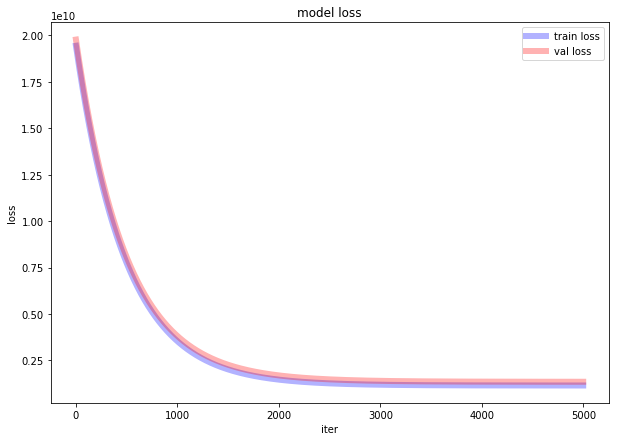

In [50]:
#関数の定義
def plot_loss(loss, val_loss):
    """
    self.loss, self.val_lossを受け取ってプロットする関数
    """
    plt.figure(figsize=(10,7))
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("iter")
    plt.plot(loss, color="b", linewidth=6, alpha=0.3, label="train loss")
    plt.plot(val_loss, color="r", linewidth=6, alpha=0.3, label="val loss")
    plt.legend()
    plt.show()

loss = SLR.loss
val_loss = SLR.val_loss
plot_loss(loss, val_loss)

## 【問題8】（アドバンス課題）バイアス項の除去

バイアス項 θ0 を抜くと学習がどう変化するか検証する。

また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行う。


In [51]:
#バイアス項を抜いたクラス
class ScratchLinearRegression_withoutBias():
    """
    線形回帰のスクラッチ実装（バイアス除去）

    Parameters
    ----------
    num_iter   : int　   イテレーション数
    lr              : float　学習率
    no_bias     : bool　バイアス項を入れない場合はTrue
    verbose    : bool　学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)   パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)           学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)     検証用データに対する損失の記録
    """

    def __init__(self, 
                 verbose=False,     #学習過程を出力する場合はTrue
                 bias=0, 
                 bias_val = 0,
                 num_iter=5000,
                 num_iter_val=5000 ,
                 lr=0.001
                ):
        
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.iter_val = num_iter_val
        self.lr = lr
        self.bias = bias
        self.bias_val = bias_val
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.array([])
        self.val_loss = np.array([])
 
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)         学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )                          学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)    検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )                    検証用データの正解値
        """
        #バイアス項の生成
        #self.bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
        #X = np.concatenate([self.bias, X], 1)
        
        #シータの初期値
        self.coef_ = np.full(X.shape[1], np.random.rand())
        
        for i in range(self.iter):
            h = self._linear_hypothesis(X)        #仮定の生成
            error = self._error_gen(h, y)          #errorの算出
            self._gradient_descent(X, error)    #θの更新
            
            #損失関数の更新
            self.loss = np.append(self.loss, np.sum(error**2)/(2*X.shape[0]))
        
        
        #検証用
        if X_val is not None and y_val is not None:
            #self.bias_val = np.ones(X_val.shape[0]).reshape(X_val.shape[0],1)
            #X_val = np.concatenate([self.bias_val, X_val], 1)
            self.coef_val_ = np.full(X_val.shape[1], np.random.rand())
            
            for i in range(self.iter):
                h = self._linear_hypothesis_val(X_val)      #仮定の生成
                error = self._error_gen(h, y_val)              #errorの算出
                self._gradient_descent_val(X_val, error)   #θの更新
                
                #損失関数の更新
                self.val_loss = np.append(self.val_loss, np.sum(error**2)/(2*X_val.shape[0]))
            
        if self.verbose:
            print(self.loss)
            print(self.val_loss)
        pass

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)  サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)  線形回帰による推定結果
        """
        #バイアス項の生成
        #p_bias = np.ones(X.shape[0]).reshape(X.shape[0],1)
        #X = np.concatenate([p_bias, X], 1)
        
        #推定
        p = np.dot(self.coef_, X.T)
        
        return p

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features+bias)   学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)   線形の仮定関数による推定結果

        """
        h = np.dot(self.coef_, X.T)
        return h

    def _linear_hypothesis_val(self, X):
        """
        検証データ用の線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features+bias)  学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)   線形の仮定関数による推定結果
        """
        h = np.dot(self.coef_val_, X.T)
        return h
    
    def _error_gen(self, h, y):
        """
        目的値と仮定値の差分を算出する
        """
        error = h - y
        
        return error

    def _gradient_descent(self, X, error):
        """
        誤差からθの差分を偏微分によって算出し、新しいθを生み出す
        
        Parameters
        -----------------
        X : 次の形のndarray, shape (n_samples, n_features+bias)   学習データ
        error：目的値と仮定値の差分（ベクトル）
        
        Returns
        -----------
        θの更新なので、返り値はいらない
        """
        error_calc = error.reshape(-1,1)*X                                   #偏微分
        error_sum = error_calc.sum(axis=0)                                #特徴量ごとに足す
        self.coef_ = self.coef_ - (error_sum/X.shape[0])*self.lr

    def _gradient_descent_val(self, X, error):
        """
        検証用データについて、誤差からθの差分を偏微分によって算出し、新しいθを生み出す
        コードの違いは「coef_val_」のみ
        Parameters
        -----------------
        X : 次の形のndarray, shape (n_samples, n_features+bias)
          学習データ
        error：目的値と仮定値の差分（ベクトル）
        
        Returns
        -----------
        θの更新なので、返り値はいらない
        """
        error_calc = error.reshape(-1,1)*X   #偏微分
        error_sum = error_calc.sum(axis=0)    #特徴量ごとに足す
        self.coef_val_ = self.coef_val_ - (error_sum/X.shape[0])*self.lr



In [52]:
SLRnonB = ScratchLinearRegression_withoutBias()
SLRnonB.fit(X_train, y_train, X_test, y_test)
y_train_pred_SLRnonB = SLRnonB.predict(X_train) 
MSE(y_train_pred_SLRnonB, y_train)

46821692052567.125

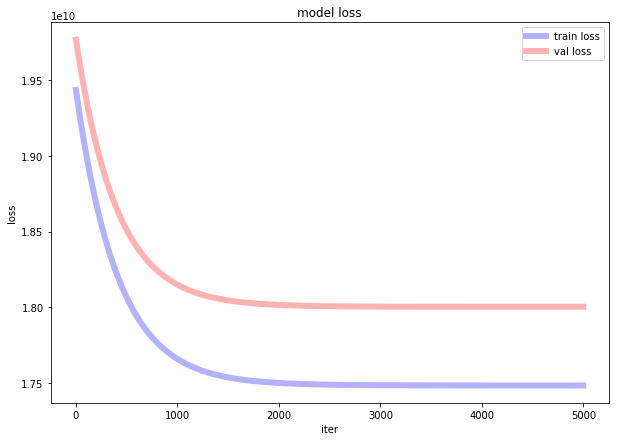

In [53]:
#関数の定義
def plot_loss(loss, val_loss):
    """
    self.loss, self.val_lossを受け取ってプロットする関数
    """
    plt.figure(figsize=(10,7))
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("iter")
    plt.plot(loss, color="b", linewidth=6, alpha=0.3, label="train loss")
    plt.plot(val_loss, color="r", linewidth=6, alpha=0.3, label="val loss")
    plt.legend()
    plt.show()

loss = SLRnonB.loss
val_loss = SLRnonB.val_loss
plot_loss(loss, val_loss)

### 【考察】
- バイアス項を抜くとlossが下がらない（モデルの適合に限界が出る）

## 【問題9】（アドバンス課題）特徴量の多次元化

特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証する。

In [54]:
X = df.iloc[:,[1,2]].values
print(X[0:10])
y = df["SalePrice"].values

X = X**2
print("Squared:\n", X[0:10])
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=0,) #シードも設定しておく

print("X_train", np.shape(X_train))
print("X_test", np.shape(X_test))
print("Y_train", np.shape(y_train))
print("Y_test", np.shape(y_test))

[[1710 2003]
 [1262 1976]
 [1786 2001]
 [1717 1915]
 [2198 2000]
 [1362 1993]
 [1694 2004]
 [2090 1973]
 [1774 1931]
 [1077 1939]]
Squared:
 [[2924100 4012009]
 [1592644 3904576]
 [3189796 4004001]
 [2948089 3667225]
 [4831204 4000000]
 [1855044 3972049]
 [2869636 4016016]
 [4368100 3892729]
 [3147076 3728761]
 [1159929 3759721]]
X_train (1095, 2)
X_test (365, 2)
Y_train (1095,)
Y_test (365,)


In [55]:
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
#スクラッチによる推定
SLR = ScratchLinearRegression()
SLR.fit(X_train, y_train, X_test, y_test)
y_train_pred_SLR = SLR.predict(X_train) 
MSE(y_train_pred_SLR, y_train)

11321806996515.262

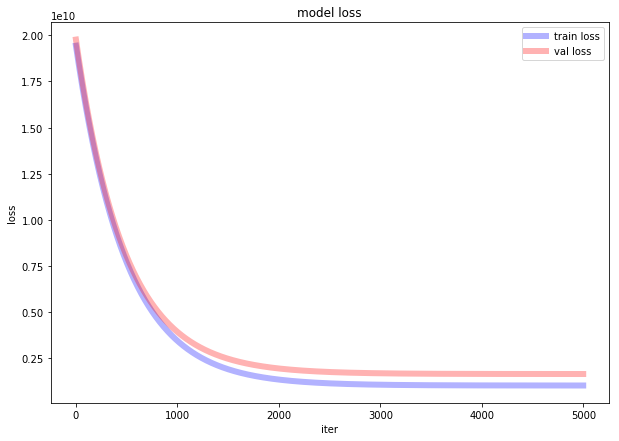

In [57]:
loss = SLR.loss
val_loss = SLR.val_loss
plot_loss(loss, val_loss)

特徴量の二乗を利用すると、スコアが若干下がった（MSEが上がった）

In [59]:
#３乗
X = df.iloc[:,[1,2]].values
print(X[0:10])
y = df["SalePrice"].values

X = X**3
print("Squared:\n", X[0:10])
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=0,) #シードも設定しておく


[[1710 2003]
 [1262 1976]
 [1786 2001]
 [1717 1915]
 [2198 2000]
 [1362 1993]
 [1694 2004]
 [2090 1973]
 [1774 1931]
 [1077 1939]]
Squared:
 [[ 5000211000  8036054027]
 [ 2009916728  7715442176]
 [ 5696975656  8012006001]
 [ 5061868813  7022735875]
 [10618986392  8000000000]
 [ 2526569928  7916293657]
 [ 4861163384  8048096064]
 [ 9129329000  7680354317]
 [ 5582912824  7200237491]
 [ 1249243533  7290099019]]


In [60]:
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
#スクラッチによる推定
SLR = ScratchLinearRegression()
SLR.fit(X_train, y_train, X_test, y_test)
y_train_pred_SLR = SLR.predict(X_train) 
MSE(y_train_pred_SLR, y_train)

10857630235422.72

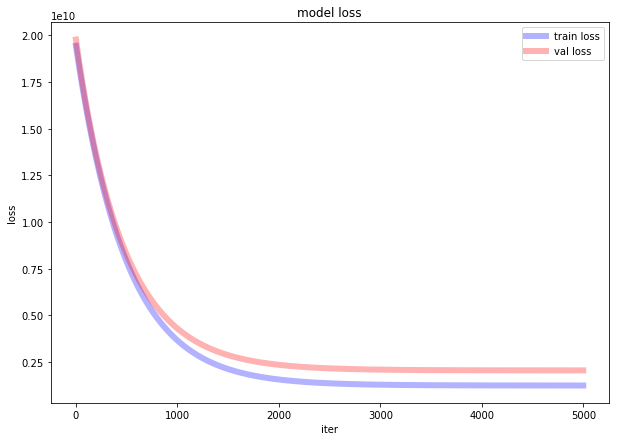

In [62]:
loss = SLR.loss
val_loss = SLR.val_loss
plot_loss(loss, val_loss)

### 結果

**MSEスコア**
 - 一乗：11055711566153.791
 - 二乗：11321806996515.262
 - 三乗：10857630235422.72
 
 ３乗が一番スコアがよかった

## 【問題10】（アドバンス課題）更新式の導出

最急降下法の更新式は以下だった。この式が導出される過程を説明する。

$$
θ_{j} := θ_{j} - α\frac{1}{m}\sum_{i=1}^{m}[( h_θ(x^{(i)})-y^{(i)} ) x_j^{(i)}]
$$


目的関数E(θ)について、

$$
E(θ) = \frac{1}{2m}\sum_{i = 1}^{m}(y^{(i)} - h_θ(x^{(i)}))^2
$$

とすると、E(θ)＝u、h_θ(x) = v　とおいた時のパラメータの更新式は

$$
\frac{\partial u}{\partial θ_j} = \frac{\partial u}{\partial v}・\frac{\partial v}{\partial θ_j}   
$$

となる。右辺をそれぞれ展開すると、

$$
\begin{align}
\frac{\partial u}{\partial v} &= \frac{\partial }{\partial v}(\frac{1}{2m}\sum_{i = 1}^{m}(y^{(i)} - v)^2) \\
&= \frac{1}{2m}\sum_{i = 1}^{m}(\frac{\partial }{\partial v}(y^{(i)} - v)^2) \\
&= \frac{1}{2m}\sum_{i = 1}^{m}(\frac{\partial }{\partial v}(y^{(i)2} - 2y^{(i)}v + v^2)) \\
&= \frac{1}{2m}\sum_{i = 1}^{m}( - 2y^{(i)} + 2v) \\
&= \frac{1}{2m}\sum_{i = 1}^{m}( 2v - 2y^{(i)}) \\
&= \frac{1}{m}\sum_{i = 1}^{m}( v - y^{(i)})) \\
&= \frac{1}{m}\sum_{i = 1}^{m}( h_θ(x^{(i)}) - y^{(i)})) \\
\frac{\partial v}{\partial θ_j} &= \frac{\partial}{\partial θ_j}(θ^Tx)  \\
&= \frac{\partial}{\partial θ_j}(θ_0x_0 + θ_1x_1 + ・・・＋ θ_nx_n) \\
&= x_j^{(i)}
\end{align}
$$

よって、

$$
\frac{\partial u}{\partial v}・\frac{\partial v}{\partial θ_j} = \frac{1}{m}\sum_{i = 1}^{m}( h_θ(x^{(i)}) - y^{(i)}))・x_j^{(i)}
$$

となり、これに学習率αをかけたものが勾配となる。

## 【問題11】（アドバンス課題）局所最適解の問題

最急降下法には一般的に局所最適解の問題がある。しかし、線形回帰では学習を続ければ必ず最適解を求めることができる。それはなぜか数式やグラフを用いて説明する。

＜参考＞
- https://analytics-notty.tech/derivation-of-least-squares-equation/
- https://mathtrain.jp/convexconcave
- https://teratail.com/questions/171186

目的関数である最小二乗法は、

$$
\begin{align}
&\sum_{i=1}^{データ数}(y_i - (wx_i + b))^2 \\
&=\sum_{i=1}^{データ数}(x_i^2w^2 + 2x_i(b - y_i)w + (b - y_i)^2)
\end{align}
$$

と書け、横軸にwをとり、縦軸に誤差の二乗の合計を取ると、以下のようなグラフになる

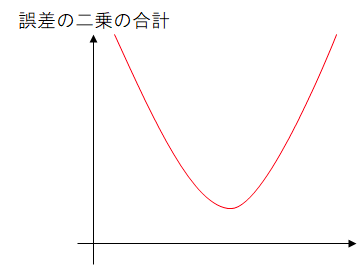

w^2の前の係数xが二乗なので、必ず下に凸のグラフ(正の二次関数)になる。

（厳密には、凸関数である証明を行うべきだが、省略する）

上記は重回帰の場合であり、多項式回帰では次数が4次以上の場合は局所解が発生しうる。
